# Problem Set 1: Data Analysis

## Exercise 1: Visualizing the data over time

### 1. Extract the data and country names from the CSV file as we did in class. Call the country names _all_countries_.

In [2]:
using CSV
using DataFrames
using Plots
using Dates
using WebIO
using Mux
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4086095772733577329\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13717357602369335409\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4086095772733577329\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv";

In [4]:
download(url, "covid_data.csv");

In [5]:
data = CSV.read("covid_data.csv", DataFrame);

In [6]:
rename!(data, 1 => "province", 2 => "country");

In [7]:
all_countries = data[:, 2];

### 2. Make a Vector called countries with a subset of countries that we wish to plot, say China, Japan, South Korea, US, United Kingdom, France, Germany. Be careful to check how they are written in the data set.

In [8]:
countries = ["China", "Japan", "Korea, South", "US", "United Kingdom", "France", "Germany"];

### 3. Define a variable num_days by extracting the number of days of data from the dataframe.

In [9]:
num_days = length(names(data)[5:end]);

### 4. We need to accumulate the data for those places that are split up into territories. Make a zero vector of the correct length for each country, e.g. using the function zeros. 
### Loop through all the countries and add the corresponding data to that country’s data. 
### You may use a dictionary (Dict), or a matrix, or a Vector containing Vectors, or a new DataFrame to store the data.

In [10]:
# Populate the country-level data dictionary for our selected countries
country_data = Dict()

for country in countries
    push!(country_data, country => zeros(num_days))
    
    df = data[findall(==(country), data.country), 5:end]
    for j in 1:num_days
        country_data[country][j] = sum((df[:, j]))
    end
end

### 5. Plot all countries’ data on the same graph by using a for loop.

In [16]:
format = Dates.DateFormat("m/d/Y")
date_strings = String.(names(data))[5:end];  # apply String function to each element
dates = parse.(Date, date_strings, format) .+ Year(2000);

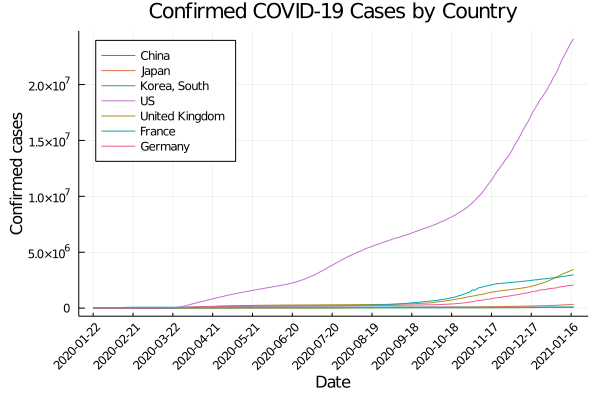

In [18]:
p = plot(xticks=dates[1:30:end], xrotation=45, leg=:topleft);
xlabel!("Date");
ylabel!("Confirmed cases");
title!("Confirmed COVID-19 Cases by Country");

for country in countries
    plot!(p, dates, country_data[country], label=country);
end
p

### 6. Now use a log scale on the 𝑦 axis. In order to do so you will need to convert the vectors to contain Float64 and replace any 0 values by NaN (“not a number”) so that Plots.jl ignores those values.

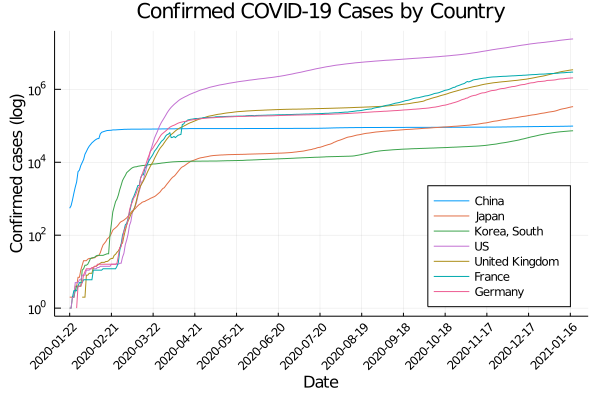

In [20]:
p_log = plot(yaxis=:log10, xticks=dates[1:30:end], xrotation=45, leg=:bottomright);
xlabel!("Date");
ylabel!("Confirmed cases (log)");
title!("Confirmed COVID-19 Cases by Country");

for country in countries
    plot!(p_log, dates, Vector{Float64}(vec(replace!(country_data[country], 0=>NaN))), label=country);
end
p_log

### Is there exponential growth?
Yes, in the early months of the pandemic there was exponential growth.

### 7. Turn this into an interactive visualization by adding a slider corresponding to the current day, varying between 1 and the total number of days for which you have data.

In [21]:
p_log_slider = plot(yaxis=:log10, xticks=dates[1:30:end], xrotation=45, leg=:bottomright)
xlabel!("Date");
ylabel!("Confirmed cases (log)");
title!("Confirmed COVID-19 Cases by Country");

for country in countries
    plot!(p_log_slider, Vector{Float64}(vec(replace!(country_data[country], 0=>NaN))), label=country)
end

In [22]:
function app(req) # req is a Mux request dictionary
    @manipulate for i in 1:num_days
        plot!(p_log_slider, xlims=(1,i))
    end
end
webio_serve(page("/", app), 8000)

IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
 [1] uv_error at 

Task (runnable) @0x000000012c4ce650

./libuv.jl:97 [inlined]
 [2] listen(::Sockets.TCPServer; backlog::Int64) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:622
 [3] #listen#10 at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:615 [inlined]
 [4] listen at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:613 [inlined]
 [5] serve(::WebSockets.ServerWS, ::Sockets.IPv4, ::Int64, ::Bool) at /Users/ericdodge/.julia/packages/WebSockets/vfjsy/src/HTTP.jl:353
 [6] serve at /Users/ericdodge/.julia/packages/WebSockets/vfjsy/src/HTTP.jl:401 [inlined]
 [7] (::Mux.var"#15#16"{Mux.App,Mux.App,Sockets.IPv4,Int64})() at ./task.jl:356
